# [E-03]카메라 스티커앱 만들기

## 두번째 시도  
- 일반 사진 배경이 아닌 cartoon 이미지에 적용이 될까? 하고 시도해 보았다.


## library import


In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
print("🌫🛸")

🌫🛸


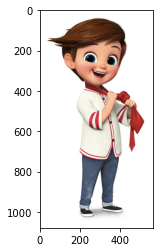

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cartoon4.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()              # 출력용 이미지를 따로 보관합니다
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  # opencv BGR -> RGB 이미지로 바꾸는 것
plt.imshow(img_rgb)
plt.show()

## 얼굴 검출 (face detection)


rectangles[]


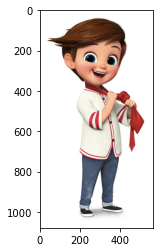

In [3]:
detector_hog = dlib.get_frontal_face_detector()  # detector를 선언
dlib_rects = detector_hog(img_rgb, 1)   # (image, 이미지 피라미드의 수)

print(dlib_rects)   # 찾은 얼굴 영역 박스 리스트(여러 얼굴이 있을 수 있다)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### cartoon은 얼굴 검출조차 되지 않는 것을 확인할 수 있었다.
- 구글링에서 검색해 보니 얼굴이 검출된 이미지들이 있기에 시도해 보았으나 실패했다.
- 정확인 원인이 무엇인지는 알 수가 없었다. 추후 다시 확인해 보아야겠다.

## 세번째 시도 - 단체사진에 적용해 보자!!

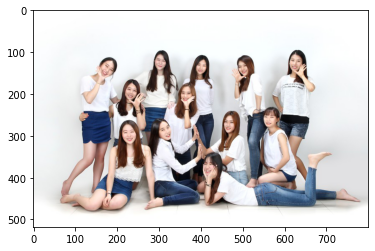

In [4]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/group.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()              # 출력용 이미지를 따로 보관합니다
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  # opencv BGR -> RGB 이미지로 바꾸는 것
plt.imshow(img_rgb)
plt.show()

## 얼굴 검출 (face detection)


rectangles[[(209, 282) (245, 318)], [(301, 274) (337, 310)], [(449, 258) (485, 294)], [(609, 110) (645, 146)], [(545, 246) (581, 282)], [(157, 126) (193, 162)], [(213, 178) (249, 214)], [(345, 190) (381, 226)], [(285, 110) (321, 146)], [(401, 358) (437, 394)], [(381, 122) (417, 158)]]


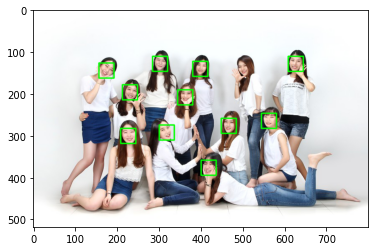

In [5]:
detector_hog = dlib.get_frontal_face_detector()  # detector를 선언
dlib_rects = detector_hog(img_rgb, 1)   # (image, 이미지 피라미드의 수)

print(dlib_rects)   # 찾은 얼굴 영역 박스 리스트(여러 얼굴이 있을 수 있다)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- 대부분의 얼굴은 검출이 되었지만 우측끝 맨뒤에서 두번째 얼굴은 검출되지 않았다.
- 추측해 보건데 얼굴이 약간 대각선으로 돌아가 있어서 검출이 되지 않았을 것으로 생각해본다.
- 계속 진행해 보았다.

## 얼굴 랜드마크 (face landmark)


In [6]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
print(list_landmarks[0])


68
[(212, 294), (212, 298), (213, 303), (215, 307), (217, 311), (220, 314), (224, 317), (228, 319), (232, 319), (236, 318), (239, 315), (242, 311), (244, 307), (246, 303), (246, 299), (245, 295), (245, 291), (214, 290), (216, 288), (219, 287), (222, 286), (225, 287), (231, 287), (234, 286), (236, 285), (239, 286), (242, 287), (228, 291), (229, 294), (229, 298), (229, 301), (226, 302), (228, 303), (230, 303), (231, 303), (233, 302), (218, 293), (220, 292), (222, 292), (224, 293), (222, 293), (220, 293), (233, 292), (235, 291), (237, 291), (239, 291), (237, 291), (235, 292), (223, 307), (225, 306), (228, 305), (230, 306), (232, 305), (235, 305), (238, 306), (236, 309), (233, 311), (231, 312), (228, 312), (226, 311), (224, 307), (228, 306), (230, 307), (233, 306), (237, 306), (233, 309), (231, 310), (228, 310)]


## landmark 이미지에 출력

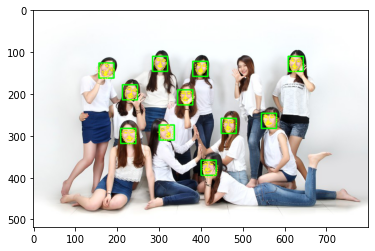

In [7]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 1, (0, 255, 255), -1)  # point가 겹쳐보여서 1로 변경

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()    
    

In [8]:
w = h = dlib_rect.width()

(37, 37, 3)


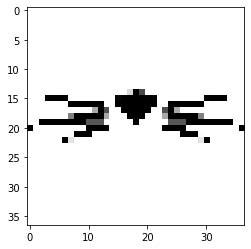

(37, 37, 3)


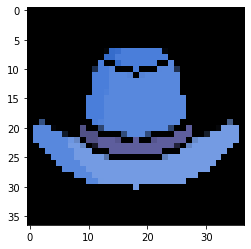

In [9]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat_mustache.png'
sticker_path1 = os.getenv('HOME')+'/aiffel/camera_sticker/images/cowboy-hat.png'

img_sticker = cv2.imread(sticker_path) # 스티커 이미지(고양이 수염)를 불러온다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
plt.imshow(img_sticker)
plt.show()

img_sticker1 = cv2.imread(sticker_path1) # 스티커 이미지(카우보이 모자)를 불러온다
img_sticker1 = cv2.resize(img_sticker1, (w,h))
print (img_sticker1.shape)
plt.imshow(img_sticker1)
plt.show()


### 얼굴마다 고양이 스티커 붙이기

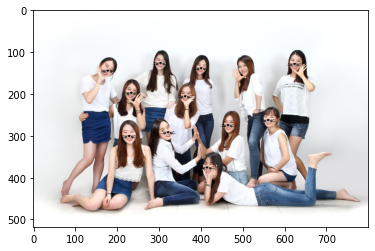

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0]
    refined_x = int(x - w // 2.0)      # left
    y = landmark[30][1]
    refined_y = int(y - w // 2.1)      # top
    
# bounding box와 landmark가 없는 원본을 불러와서 바로 최종 결과만 출력
    sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 얼굴마다 카우보이 모자 스티커 붙이기

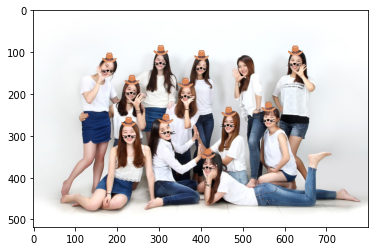

In [11]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[27][0]
    refined_x = int(x - w // 2.0)      # left
    y = landmark[27][1]
    refined_y = int(y - w // 0.85)      # top
    
# bounding box와 landmark가 없는 원본을 불러와서 바로 최종 결과만 출력
    sticker_area1 = img_bgr[refined_y:refined_y+img_sticker1.shape[0], refined_x:refined_x+img_sticker1.shape[1]]
    img_bgr[refined_y:refined_y+img_sticker1.shape[0], refined_x:refined_x+img_sticker1.shape[1]] = \
    np.where(img_sticker1==0,sticker_area1,img_sticker1).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 회고

## 카메라 스티커앱 두번째 시도

- 첫 시도에선 본인의 사진을 배경으로 스티커 붙이기를 시도하였기에 두번째는 좀더 다양한 시도를 해보았다.
- cartoon도 인물 사진이면 될까? 하는 궁금증에서 시작하였는데 얼굴 검출조차 안되서 의아하게 생각되었다. 이 부분은 좀더 공부를 해보아야 겠다.
- 또 다른 시도는 단체 사진에서 고양이 수염과 카오보이 모자를 붙이는 시도였는데 12명 중에 11명의 얼굴을 검출하였다. 생각보다 잘 찾는다는 생각이 들었고 검출이 안된 부분은 너무 작은 이미지에 얼굴 각도가 틀어져 있었고, 이목구비가 다른 얼굴에 비해 흐릿한 느낌이어서 그럴것 같다고 생각이 들었다.
- 또한 얼굴이 기울어져 있는 부분은 고양이 수염과 모자가 잘 어울리지 않는 모습을 보여서 경사 각도를 구해서 시도해 보고 싶었으나 부족한 시간으로 인해 차후에 시도해 보려고 한다. 늘 시간은 부족한 거 같다.